In [20]:
#1. pandas demo
import pandas as pd

# Load data and print to confirm it worked
data = pd.read_csv(r'C:\Users\prade\Downloads\archive\salaries.csv')
print("Original data:")
print(data.head(5))

# Get and print the first 5 elements
print("\nFirst 5 elements:")
print(data.head(5))

# Get and print the last 5 elements
print("\nLast 5 elements:")
print(data.tail(5))

# Add a column and print the modified data
data['new'] = 'sample'
print("\nData with new column:")
print(data.head(5))

# Drop the column and print the result (does not modify `data` by default)
print("\nData with 'new' column dropped:")
data_dropped = data.drop('new', axis=1)
print(data_dropped.head(5))

# Print information about the DataFrame
print("\nDataFrame shape:")
print(data.shape)
print("\nDataFrame index:")
print(data.index)
print("\nDataFrame columns:")
print(data.columns)
print("\nDataFrame info():")
data.info()
print("\nDataFrame describe():")
print(data.describe())

# Rename a column and print the result (does not modify `data` by default)
print("\nDataFrame with renamed column:")
data_renamed = data.rename(columns={'new': 'renamednew'})
print(data_renamed.head(5))

# Apply a function and print the result (does not modify `data` by default)
def func(num):
    return num * 10
df_applied = data.apply(func)
print("\nDataFrame after applying function:")
print(df_applied.head(5))

# Check for null values and print results
print("\nNull values check:")
print(data.isnull().head(5))
print("\nNot null values check:")
print(data.notnull().head(5))

# Calculate and print the mean
print("\nMean of numerical columns:")
print(data.mean(numeric_only=True))

# Calculate and print the sum
print("\nSum of numerical columns:")
print(data.sum(numeric_only=True))



Original data:
   work_year experience_level employment_type             job_title  salary  \
0       2020               EN              FT   Azure Data Engineer  100000   
1       2020               EN              CT    Staff Data Analyst   60000   
2       2020               SE              FT  Staff Data Scientist  164000   
3       2020               EN              FT          Data Analyst   42000   
4       2020               EX              FT        Data Scientist  300000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         100000                 MU             0   
1             CAD          44753                 CA            50   
2             USD         164000                 US            50   
3             EUR          47899                 DE             0   
4             USD         300000                 US           100   

  company_location company_size  
0               MU            S  
1               CA         

In [4]:
# preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

# -------- Raw Data --------
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Helen", "Ian", "Julia"],
    "Age": [25, None, 29, 35, 28, 32, 27, 30, 26, 31],
    "Salary": [50000, 48000, np.nan, 52000, 49000, 51000, 47000, np.nan, 46000, 54000],
    "Department": ["HR", "IT", "Finance", "HR", "IT", "Finance", "IT", "HR", "Finance", "IT"],
    "Experience": [2, 3, 4, np.nan, 3, 5, 2, 4, 2, 6],
    "City": ["New York", "Los Angeles", "Chicago", "New York", "Los Angeles", np.nan, "Los Angeles", "New York", "Chicago", "Los Angeles"],
    "Gender": ["Female", "Male", "Male", "Male", "Female", "Male", "Female", "Female", "Male", np.nan],
    "Joined_Date": ["2019-03-14", "2018-07-09", "2017-12-23", "2020-01-17", "2019-11-30", "2016-05-05", "2021-02-11", np.nan, "2020-08-19", "2015-10-03"]
}

# -------- Columns --------
num_cols = ['Age','Salary','Experience']
cat_cols = ['Name','Department','City','Gender','Joined_Date']

#----- converting raw data to DataFrame
df = pd.DataFrame(data)
print('-----------------Raw Data-------------------')
print(df)

#-----imputattion applied - removing none values
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])
num_imputer = SimpleImputer(strategy='mean')
df[num_cols]=num_imputer.fit_transform(df[num_cols])
print('-----------------Data After imputation------------------')
print(df)

#standardization - mean to 0 and sd to 1
std_scaler = StandardScaler()
df[num_cols] = std_scaler.fit_transform(df[num_cols])
print('-----------------Data After Standarization-------------------')
print(df)


#Normalisation - limiting the range of values to certain range to avoide high potential large or small values to alter prediction
nrm_scaler = MinMaxScaler()
df[num_cols]=nrm_scaler.fit_transform(df[num_cols])
print('---------------Data aftre Normaliztion-----------------------')
print(df)


df = df.drop_duplicates()
print('---------------Data after dropping duplicates-------------------')
print(df)

print(df.describe())



-----------------Raw Data-------------------
      Name   Age   Salary Department  Experience         City  Gender  \
0    Alice  25.0  50000.0         HR         2.0     New York  Female   
1      Bob   NaN  48000.0         IT         3.0  Los Angeles    Male   
2  Charlie  29.0      NaN    Finance         4.0      Chicago    Male   
3    David  35.0  52000.0         HR         NaN     New York    Male   
4      Eva  28.0  49000.0         IT         3.0  Los Angeles  Female   
5    Frank  32.0  51000.0    Finance         5.0          NaN    Male   
6    Grace  27.0  47000.0         IT         2.0  Los Angeles  Female   
7    Helen  30.0      NaN         HR         4.0     New York  Female   
8      Ian  26.0  46000.0    Finance         2.0      Chicago    Male   
9    Julia  31.0  54000.0         IT         6.0  Los Angeles     NaN   

  Joined_Date  
0  2019-03-14  
1  2018-07-09  
2  2017-12-23  
3  2020-01-17  
4  2019-11-30  
5  2016-05-05  
6  2021-02-11  
7         NaN  
8  2020

In [ ]:
#3.finds
import numpy as np

# Dataset
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 0],
    ['Sunny', 'Hot', 'High', 'Strong', 0],
    ['Overcast', 'Hot', 'High', 'Weak', 1],
    ['Rainy', 'Mild', 'High', 'Weak', 1],
    ['Rainy', 'Cool', 'Normal', 'Weak', 1],
    ['Rainy', 'Cool', 'Normal', 'Strong', 0],
    ['Overcast', 'Cool', 'Normal', 'Weak', 1],
    ['Sunny', 'Mild', 'High', 'Weak', 0],
    ['Sunny', 'Cool', 'Normal', 'Weak', 1],
    ['Rainy', 'Mild', 'Normal', 'Weak', 1]
]
data = np.array(data)
def FindS(data):
    hypothesis = [None]*4
    for feature in data:
        if feature[-1] == '1':  
            for i in range(len(hypothesis)):
                if hypothesis[i] is None:
                    hypothesis[i] = feature[i]  
                elif hypothesis[i] != feature[i]:
                    hypothesis[i] = '?' 
    return hypothesis
print("Most specific hypothesis:", FindS(data))


Linear Reg -mse : 1.1913172924516304
Linear Reg -r2Score : 0.9565792141691536
-------------------------------------------------
Polynomial Reg -mse : 1.152947941709253
Polynomial Reg -r2Score : 0.95797768909402
-------------------------------------------------
Lasso -mse : 1.1331729864154763
Lasso -r2Score : 0.9586984409072156
-------------------------------------------------
Ridge -mse : 1.1871483635118525
Ridge Reg -r2Score : 0.9567311620773936


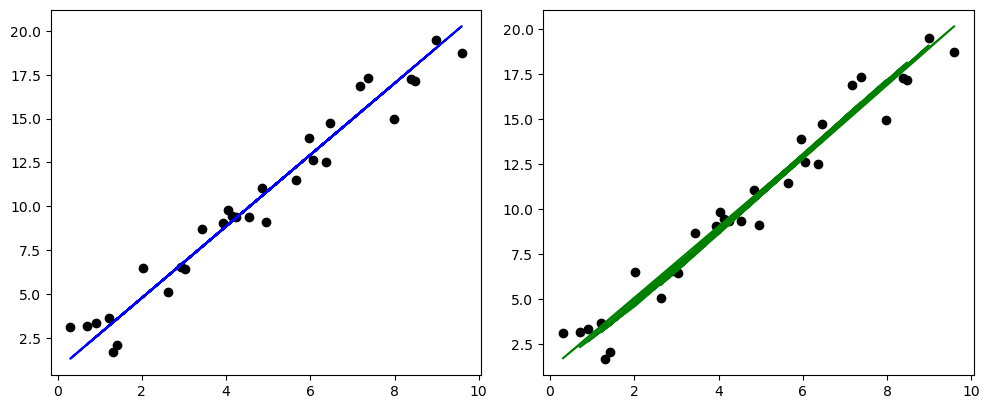

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

np.random.seed(42)
X = np.linspace(0,10,100).reshape(-1,1)
Y = 2*X.flatten()+1+np.random.normal(0,1,X.shape[0])
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=30)

linear = LinearRegression()
linear.fit(x_train,y_train)#training
y_pred = linear.predict(x_test)#predicting x_test
print(f'Linear Reg -mse : {mean_squared_error(y_test,y_pred)}')
print(f'Linear Reg -r2Score : {r2_score(y_test,y_pred)}')
print("-------------------------------------------------")

polynomial = PolynomialFeatures(degree=3)
x_poly_train = polynomial.fit_transform(x_train)
x_poly_test = polynomial.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)
y_poly_pred = poly_model.predict(x_poly_test)
print(f'Polynomial Reg -mse : {mean_squared_error(y_test,y_poly_pred)}')
print(f'Polynomial Reg -r2Score : {r2_score(y_test,y_poly_pred)}')
print("-------------------------------------------------")


lasso = Lasso()
lasso.fit(x_train,y_train)
y_lasso_pred = lasso.predict(x_test)
print(f'Lasso -mse : {mean_squared_error(y_test,y_lasso_pred)}')
print(f'Lasso -r2Score : {r2_score(y_test,y_lasso_pred)}')
print("-------------------------------------------------")

ridge = Ridge()
ridge.fit(x_train,y_train)
y_ridge_pred = ridge.predict(x_test)
print(f'Ridge -mse : {mean_squared_error(y_test,y_ridge_pred)}')
print(f'Ridge Reg -r2Score : {r2_score(y_test,y_ridge_pred)}')


plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(x_test,y_test,color="black",label="actual")
plt.plot(x_test,y_pred,color="blue",label="precited lr")
plt.tight_layout()

plt.subplot(2,2,2)
plt.scatter(x_test,y_test,color='black',label='actual')
plt.plot(x_test,y_poly_pred,color='green',label='predicted pr')
plt.tight_layout()

plt.show()

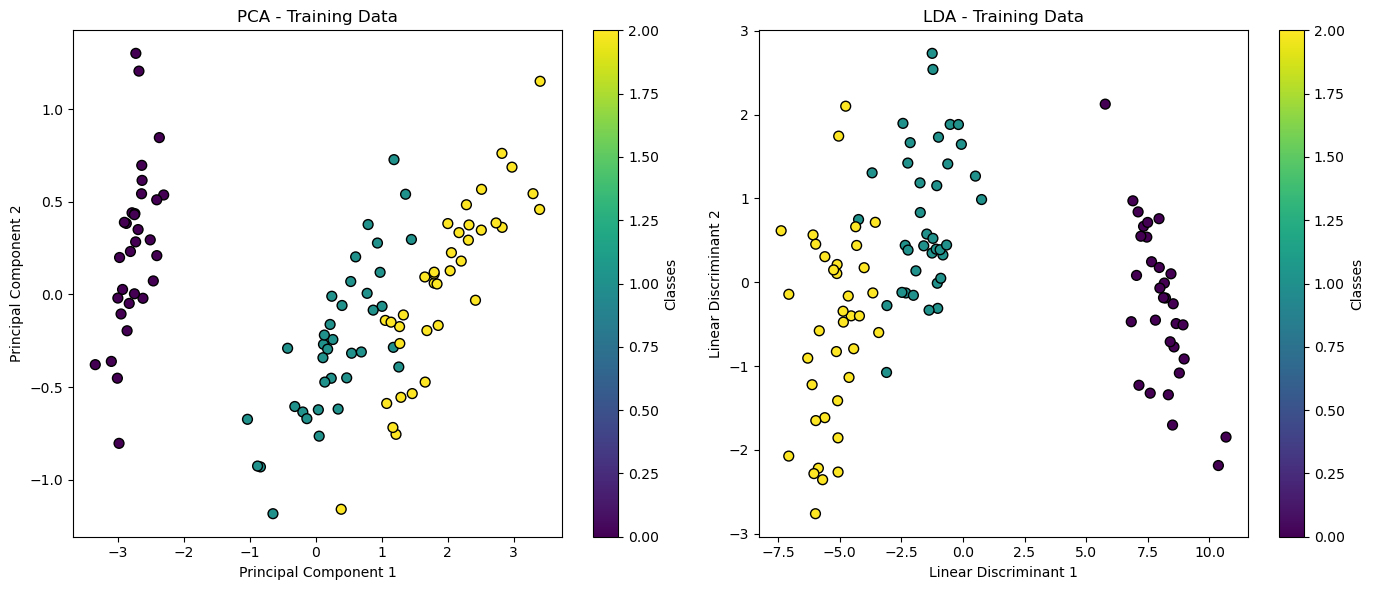

Explained variance ratio for PCA: [0.9191876  0.05549301]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset (a common dataset for classification)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. PCA - Principal Component Analysis
pca = PCA(n_components=2)  # Reducing to 2 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 2. LDA - Linear Discriminant Analysis
lda = LDA(n_components=2)  # Reducing to 2 components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# 3. Plot the reduced data

# PCA plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA - Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Classes")

# LDA plot
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("LDA - Training Data")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar(label="Classes")

plt.tight_layout()
plt.show()

# Print explained variance ratio for PCA
print(f"Explained variance ratio for PCA: {pca.explained_variance_ratio_}")


Accuracy of K-NN: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



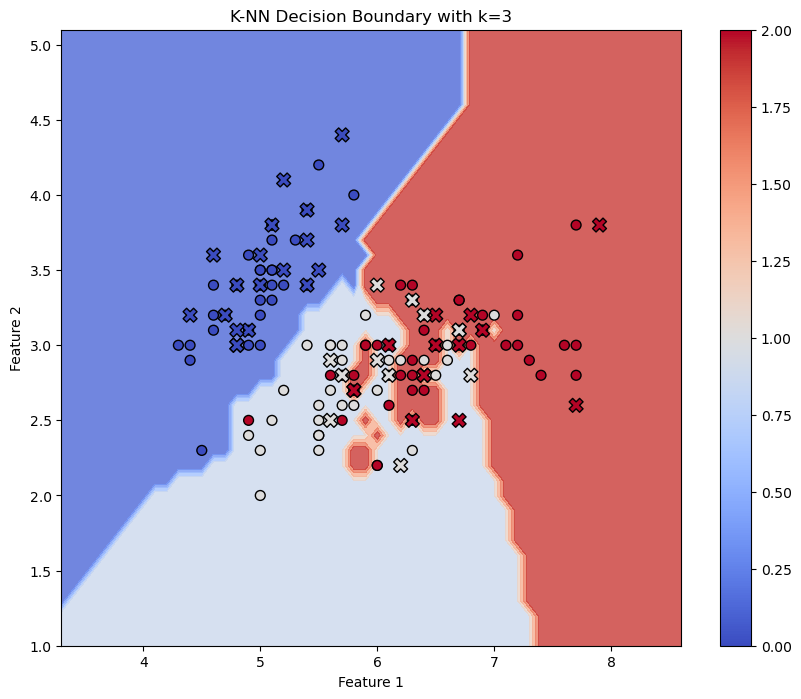

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the K-NN classifier with k=3
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy of K-NN: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the decision boundary (for the first two features)
# We will use only the first two features for simplicity in visualizing the decision boundary.
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train the K-NN classifier again using only the first two features
knn.fit(X_train_2d, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', s=50, cmap='coolwarm')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='black', s=100, marker='X', cmap='coolwarm')
plt.title("K-NN Decision Boundary with k=3")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


In [18]:
#7.	Apply suitable classifier model to classify the creditstatus to be good or bad on german creditdataset.csv,create confusionmatrix t omeasure the accuracy of the model(using Logistic Regression/SVM/Naïve Bayes).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = 'german_credit_dataset.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Preprocessing
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop(columns=['Credit_Status'])  # Replace 'Credit_Status' with the actual target column name
y = data['Credit_Status']  # Replace 'Credit_Status' with the actual target column name

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


KeyError: "['Credit_Status'] not found in axis"

In [17]:
 #8.Applytrainsetsplitanddeveloparegressionmodeltopredictthesoldpriceofplayers   usingimb381ipl2013.csvbuildacorrelationmatrixbetweenallthenumericfeaturesin dataset and visualize the heatmap. RMSE of train and test data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = 'imb381ipl2013.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Preprocessing
# Encode categorical variables if any
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Feature selection
X = data.drop(columns=['SoldPrice'])  # Replace 'SoldPrice' with the actual target column
y = data['SoldPrice']  # Replace 'SoldPrice' with the actual target column

# Build correlation matrix
correlation_matrix = data.corr()

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Develop a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output the results
print("RMSE for Training Data:", rmse_train)
print("RMSE for Testing Data:", rmse_test)


FileNotFoundError: [Errno 2] No such file or directory: 'imb381ipl2013.csv'

In [ ]:
#9.SpamDetection:Givenemailinaninbox,identifythoseemailmessagesthatarespam   andthosethatarenot.Havingamodelofthisproblemwouldallowaprogramtoleave non-spam emails in the inbox and move spam emails to a spam folder. (logistic regression)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
# Example: Dataset contains columns 'text' (email content) and 'label' (spam or not spam)
file_path = 'spam_dataset.csv'  # Replace with the correct file path
data = pd.read_csv(file_path)

# Preprocessing
# Encode the target variable ('spam' as 1, 'not spam' as 0)
data['label'] = data['label'].map({'spam': 1, 'not spam': 0})

# Split data into features and target
X = data['text']  # Email text
y = data['label']  # Spam or not spam

# Convert text data into numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'glass.csv' # Replace with the correct file path
data = pd.read_csv(file_path)
# Preprocessing
# Separate features and target
X = data.drop(columns=['Type']) # Replace 'Type' with the actual target column
name
y = data['Type'] # Replace 'Type' with the actual target column name
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42, stratify=y)

# Gini Index Decision Tree
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train, y_train)
# Entropy Decision Tree
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(X_train, y_train)
# Predictions
gini_pred = gini_tree.predict(X_test)
entropy_pred = entropy_tree.predict(X_test)
# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\n")
evaluate_model(y_test, gini_pred, "Decision Tree with Gini Index")
evaluate_model(y_test, entropy_pred, "Decision Tree with Entropy")
# Visualize the trees
plt.figure(figsize=(20, 10))
plot_tree(gini_tree, feature_names=X.columns, class_names=[str(c) for c in
y.unique()], filled=True)
plt.title("Decision Tree using Gini Index")
plt.show()
plt.figure(figsize=(20, 10))
plot_tree(entropy_tree, feature_names=X.columns, class_names=[str(c) for c in
y.unique()], filled=True)
plt.title("Decision Tree using Entropy")
plt.show()
# Display tree structure as text
print("Gini Tree Structure:")
print(export_text(gini_tree, feature_names=list(X.columns)))
print("\nEntropy Tree Structure:")
print(export_text(entropy_tree, feature_names=list(X.columns)))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = 'glass.csv' # Replace with the correct file path
data = pd.read_csv(file_path)
# Preprocessing
# Separate features and target
X = data.drop(columns=['Type']) # Replace 'Type' with the actual target column
name
y = data['Type'] # Replace 'Type' with the actual target column name
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42, stratify=y)
# Fit the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
y_pred = rf_model.predict(X_test)
# Evaluation
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, orient='h', palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

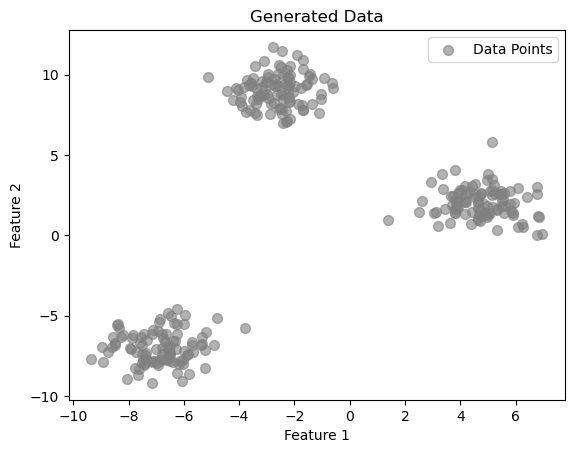

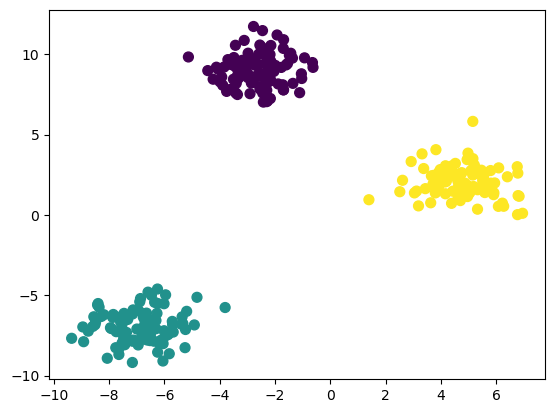

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters,n_features=n_features, random_state=random_state)
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.6, label="Data Points")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label="sample")


In [23]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best",